In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/train (1).csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from typing_extensions import dataclass_transform
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) #shuffle the data

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.


Plotting a sample


the image value is 1


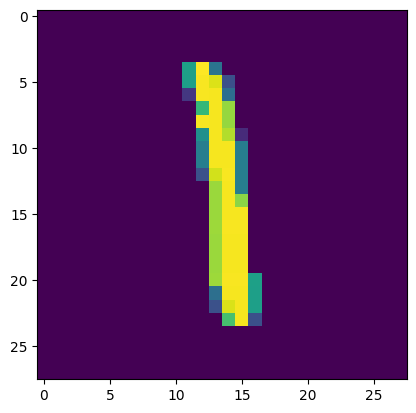

In [4]:
index = 1200
plt.imshow(data[index][1:len(data[index])].reshape(28,28))
print(f"the image value is {data[index][0]}")

Our Neural Network  Arhitecture

In [5]:
import numpy as np

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.zeros((10, 1))
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z))  # Subtracting max(Z) for numerical stability
    return exp_Z / exp_Z.sum(axis=0, keepdims=True)

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Example usage:
W1, b1, W2, b2 = init_params()
print("W1 shape:", W1.shape)
print("b1 shape:", b1.shape)
print("W2 shape:", W2.shape)
print("b2 shape:", b2.shape)

# Testing ReLU
Z = np.array([[-1, 0, 2], [3, -2, 1]])
print("ReLU(Z):")
print(ReLU(Z))

# Testing softmax
Z = np.array([[1, 2, 3], [4, 5, 6]])
print("softmax(Z):")
print(softmax(Z))

# Testing ReLU_deriv
Z = np.array([[-1, 0, 2], [3, -2, 1]])
print("ReLU_deriv(Z):")
print(ReLU_deriv(Z))

# Testing one_hot
Y = np.array([0, 1, 2])
print("one_hot(Y):")
print(one_hot(Y))




W1 shape: (10, 784)
b1 shape: (10, 1)
W2 shape: (10, 10)
b2 shape: (10, 1)
ReLU(Z):
[[0 0 2]
 [3 0 1]]
softmax(Z):
[[0.04742587 0.04742587 0.04742587]
 [0.95257413 0.95257413 0.95257413]]
ReLU_deriv(Z):
[[False False  True]
 [ True False  True]]
one_hot(Y):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [6]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


In [7]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    m = X.shape[1]  # Number of training examples

    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2


In [8]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2


In [14]:
import numpy as np

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.zeros((10, 1))
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z))  # Subtracting max(Z) for numerical stability
    return exp_Z / exp_Z.sum(axis=0, keepdims=True)

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    m = X.shape[1]  # Number of training examples

    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2




In [15]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
0.10931707317073171
Iteration:  10
0.2693170731707317
Iteration:  20
0.35641463414634145
Iteration:  30
0.4235609756097561
Iteration:  40
0.470780487804878
Iteration:  50
0.5064146341463415
Iteration:  60
0.5384146341463415
Iteration:  70
0.5661219512195121
Iteration:  80
0.5900487804878048
Iteration:  90
0.6125609756097561
Iteration:  100
0.6326585365853659
Iteration:  110
0.6499512195121951
Iteration:  120
0.6670487804878049
Iteration:  130
0.6818780487804879
Iteration:  140
0.6956097560975609
Iteration:  150
0.7086829268292683
Iteration:  160
0.7210731707317073
Iteration:  170
0.7310975609756097
Iteration:  180
0.7399512195121951
Iteration:  190
0.7476829268292683
Iteration:  200
0.7544390243902439
Iteration:  210
0.7605609756097561
Iteration:  220
0.7675365853658537
Iteration:  230
0.772609756097561
Iteration:  240
0.7774634146341464
Iteration:  250
0.7813170731707317
Iteration:  260
0.7857317073170732
Iteration:  270
0.7893658536585366
Iteration:  280
0.7935609756097

In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


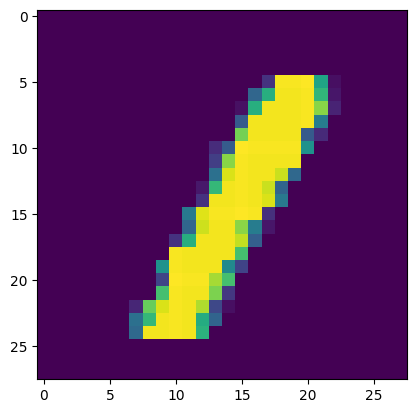

Prediction:  [1]
Label:  1


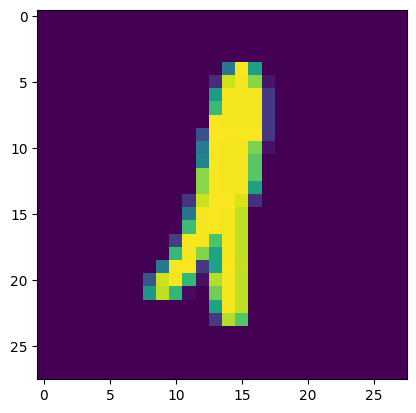

Prediction:  [1]
Label:  1


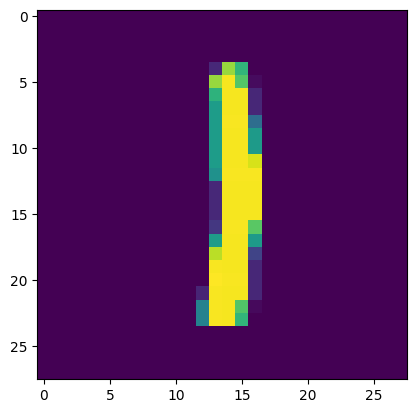

Prediction:  [0]
Label:  0


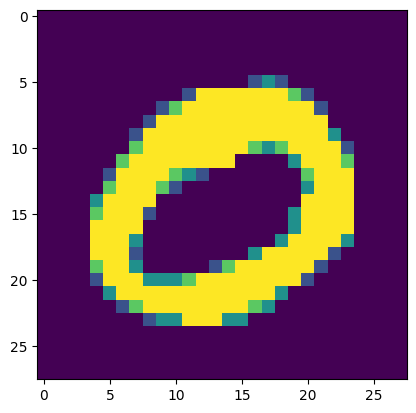

In [17]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [18]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

0.849